In [7]:
import numpy as np
import matplotlib.pyplot as plt
from etc.SVI import SVI
from etc.SVI_CV import SVI_CV

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Logistic regression on Sonar

In [8]:
# Naive estimator
runner = SVI(
    model_dir='./models/LogisticRegression',
    dataset='australian',
    observed_vars=['X', 'y']
)
_, losses, _ = runner.run(num_iters=5000, step_size=1e-4, batch_size=5, opt='sgd')

In [9]:
# JointCV estimator
runner = SVI_CV(
    model_dir='./models/LogisticRegression',
    dataset='australian',
    observed_vars=['X', 'y']
)
_, lossesCV, _ = runner.run(num_iters=5000, step_size=1e-4, batch_size=5, opt='sgd')

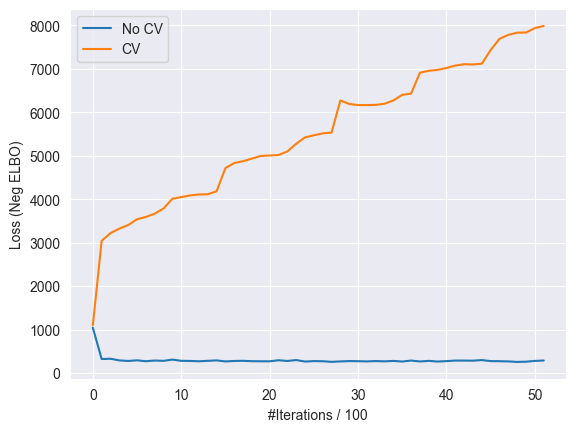

In [11]:
plt.plot(losses, label='No CV')
plt.plot(lossesCV, label='CV')
plt.ylabel('Loss (Neg ELBO)')
plt.xlabel('#Iterations / 100')
plt.legend()
# plt.ylim(top=400, bottom=225)

## MovieLens (subset)

In [12]:
# Have a peek of the data
data_tiny = np.load('./models/MovieLens/tiny.npz')
print("Tiny subset size:", data_tiny['X'].shape)

data_full = np.load('./models/MovieLens/full.npz')
print("Full dataset size:", data_full['X'].shape)

Tiny subset size: (500, 18)
Full dataset size: (100000, 18)


In [13]:
# Naive estimator
runner = SVI(
    model_dir='./models/MovieLens',
    dataset='tiny', # Subset of MovieLens
    observed_vars=['X', 'y', 'group_id']
)
_, losses, _ = runner.run(num_iters=10000, step_size=5e-2, batch_size=10, opt='adam')

In [16]:
# Naive estimator
runner = SVI_CV(
    model_dir='./models/MovieLens',
    dataset='tiny', # Subset of MovieLens
    observed_vars=['X', 'y', 'group_id']
)
_, lossesJCV, _ = runner.run(num_iters=10000, step_size=5e-2, batch_size=10, opt='adam')

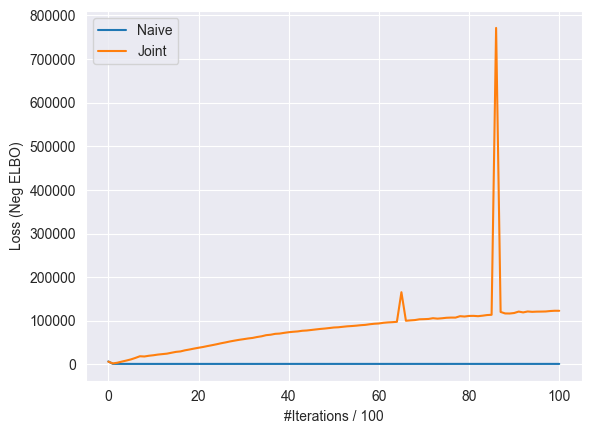

In [17]:
plt.plot(losses, label='Naive')
plt.plot(lossesJCV, label='Joint')
plt.ylabel('Loss (Neg ELBO)')
plt.xlabel('#Iterations / 100')
plt.legend()
# plt.ylim(top=1400, bottom=1280)